Name : J Karan Tejas

Roll No : 191EE126

In [3]:
import numpy as np
import IPython
from IPython.display import Audio , display, Javascript
import scipy
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks, chirp, spectrogram
import math
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
import pandas as pd
from google.colab import output

In [4]:
alpha = 1 + 126 % 3  
pi = np.pi

$\alpha = 1$

# Problem 1

In [137]:
plt.rcParams.update({
    "figure.figsize": (12,6),
    "font.size": 12})

Part 1:

In [138]:
def plot_signal(x, y,title = None,llabel = None, savfig = None):  
    plt.plot(x,y,label = llabel)
    plt.legend()
    plt.title('Time Domain Plot',fontsize = 20)
    plt.xlabel('Sample Number',fontsize = 16)
    plt.ylabel('Signal',fontsize = 16)
    plt.savefig(savfig)
    plt.figure()

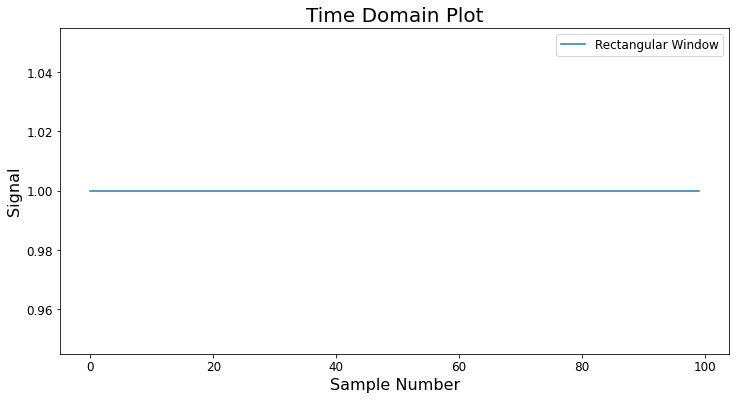

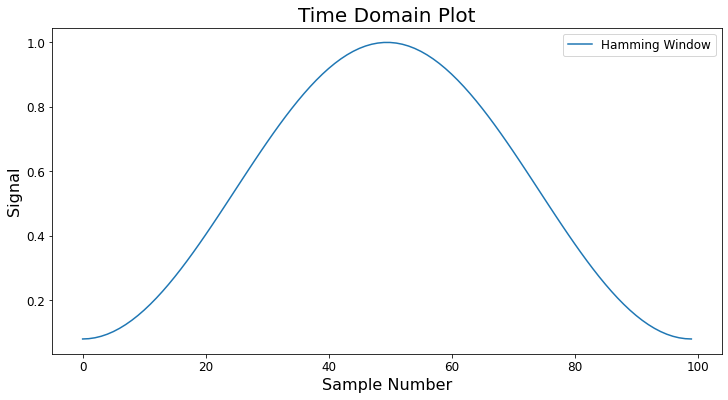

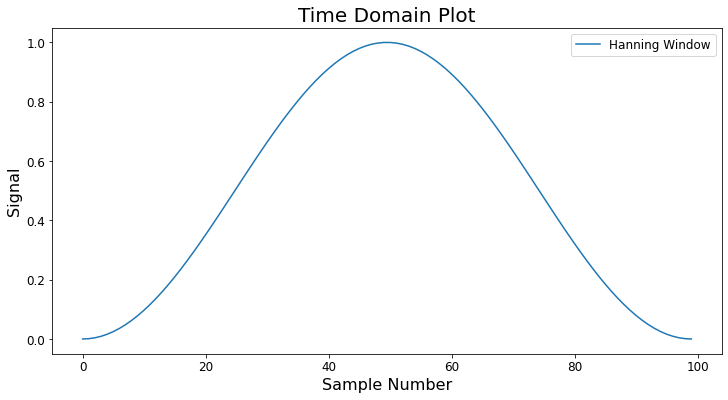

<Figure size 864x432 with 0 Axes>

In [139]:
n=np.arange(0, 100)
plot_signal(n, sp.windows.boxcar(100), llabel = 'Rectangular Window',savfig = 'q1p1.png')
plot_signal(n, sp.windows.hamming(100), llabel = 'Hamming Window',savfig = 'q1p2.png')
plot_signal(n, sp.windows.hann(100), llabel = 'Hanning Window',savfig = 'q1p3.png')

Part 2:

In [140]:
plt.rcParams.update({
    "figure.figsize": (15,8),
    "font.size": 12})
def plot_mag_spec(N, L,title = None,llabel = None,clr = None):  
    w=sp.windows.hamming(L)
    k = np.arange(0, N)
    W=fft(w, n=N)
    plt.plot(k*2*np.pi/N, 20*np.log10(np.abs(W)/L),label = llabel)
    plt.legend()
    plt.title('Magnitude Spectrum Plot',fontsize = 20)
    plt.xlabel(r'$\omega$',fontsize = 16)
    plt.ylabel(r'|X($\omega$)|',fontsize = 16)
    plt.xlim([0, np.pi/2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


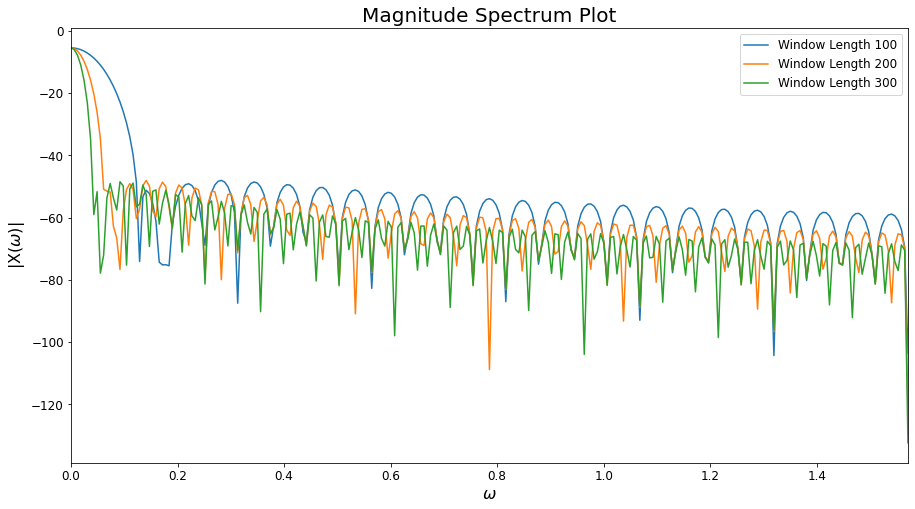

In [141]:
plot_mag_spec(1024, 100, llabel = 'Window Length 100')
plot_mag_spec(1024, 200, llabel = 'Window Length 200')
plot_mag_spec(1024, 300, llabel = 'Window Length 300')
plt.savefig('q1p4.png')

# Problem 2

In [142]:
plt.rcParams.update({
    "figure.figsize": (12,6),
    "font.size": 12})

Part 1:

In [143]:
def plot_filter(x, y,title = None,llabel = None, savfig = None):  
    plt.stem(x,y,label = llabel)
    plt.legend()
    plt.title('Low-pass FIR filter impulse response',fontsize = 20)
    plt.xlabel('n',fontsize = 16)
    plt.ylabel('h(n)',fontsize = 16)
    plt.savefig(savfig)
    plt.figure()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


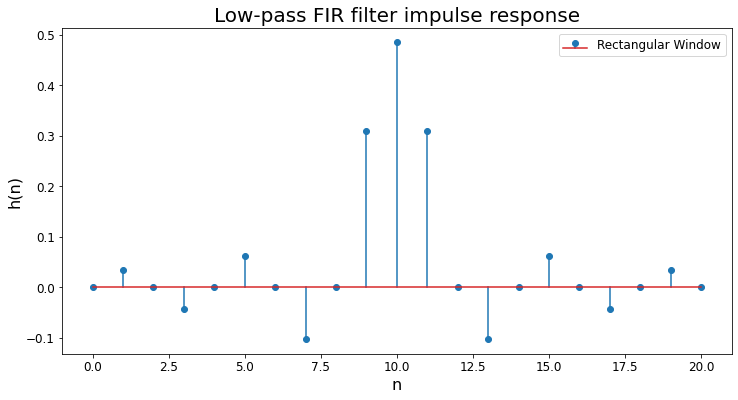

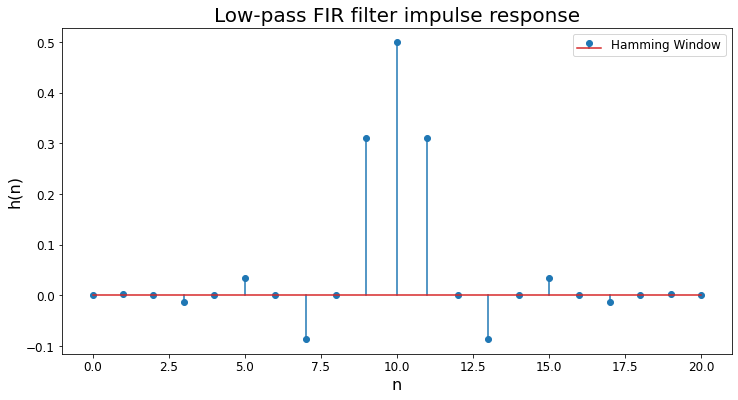

<Figure size 864x432 with 0 Axes>

In [144]:
M = 21
wc = np.pi/(1 + alpha)
fc = wc/(2*np.pi)
rec_fil = sp.firwin(M, 2*fc, window='boxcar')
hamm_fil = sp.firwin(M, 2*fc, window='hamming')
n=np.arange(0, M)
plot_filter(n, rec_fil, llabel = 'Rectangular Window',savfig = 'q2p1.png')
plot_filter(n, hamm_fil, llabel = 'Hamming Window',savfig = 'q2p2.png')

Part 2:

In [145]:
def plot_bode_mag(x, y,title = None,llabel = None, savfig = None):  
    plt.semilogx(x,y)
    plt.title(title,fontsize = 20)
    plt.xlabel('Frequency (Hz)',fontsize = 16)
    plt.ylabel('Magnitude (dB)',fontsize = 16)
    plt.grid(True, which='both', ls='-')
    plt.savefig(savfig)
    plt.figure()

def plot_bode_phase(x, y,title = None,llabel = None, savfig = None):  
    plt.plot(x,y)
    plt.title(title,fontsize = 20)
    plt.xlabel('Frequency (Hz)',fontsize = 16)
    plt.ylabel('Phase (radians)',fontsize = 16)
    plt.grid(True, which='both', ls='-')
    plt.savefig(savfig)
    plt.figure()

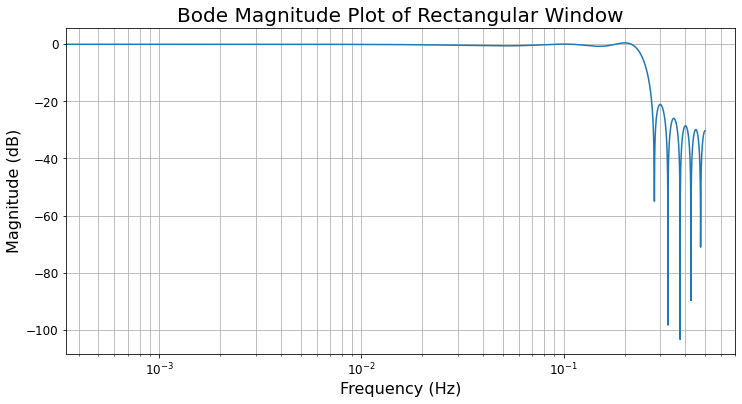

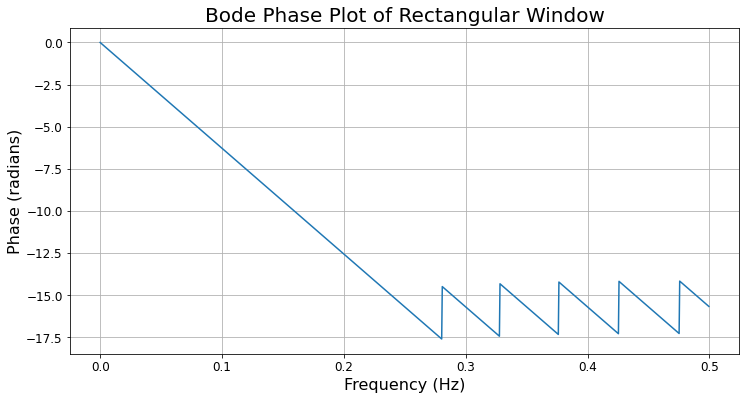

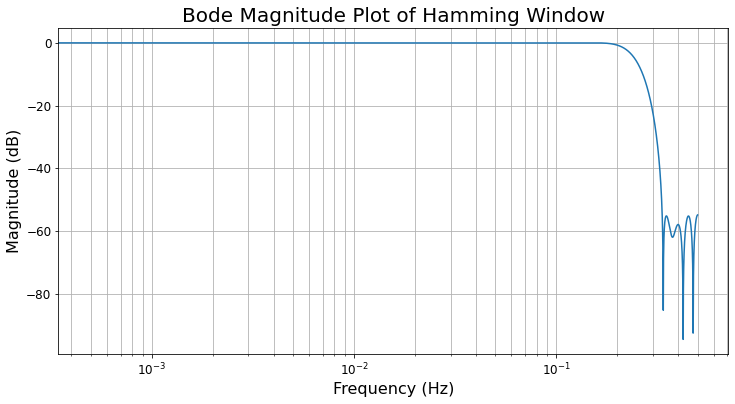

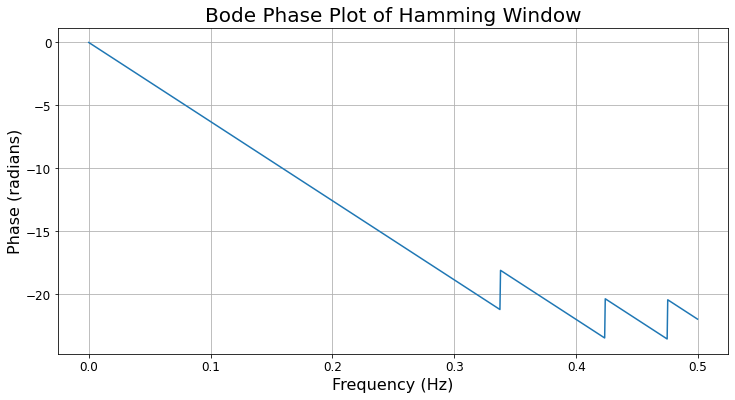

<Figure size 864x432 with 0 Axes>

In [146]:
d = np.zeros(M)
d[0] = 1
f1, mag1 = sp.freqz(rec_fil, d, 1024)
plot_bode_mag(f1/(2*np.pi), 20*np.log10(np.abs(mag1)), title = 'Bode Magnitude Plot of Rectangular Window',savfig = 'q2p3.png')
plot_bode_phase(f1/(2*np.pi), np.unwrap(np.angle(mag1)), title  = 'Bode Phase Plot of Rectangular Window',savfig = 'q2p4.png')
f2, mag2 = sp.freqz(hamm_fil, d, 1024)
plot_bode_mag(f2/(2*np.pi), 20*np.log10(np.abs(mag2)), title  = 'Bode Magnitude Plot of Hamming Window',savfig = 'q2p5.png')
plot_bode_phase(f2/(2*np.pi), np.unwrap(np.angle(mag2)), title  = 'Bode Phase Plot of Hamming Window',savfig = 'q2p6.png')

# Problem 3

In [147]:
def spectrogram(y, Nos, fs, window=None, title=None,savfile = None):
  if window=='hamming':
    ws=sp.windows.hamming(Nos)
  elif window=='hanning':
    ws=sp.windows.hanning(Nos)
  elif window=='blackman':
    ws=sp.windows.blackman(Nos)
  else:
    ws=sp.windows.boxcar(Nos)
  spec, freqs, t, im = plt.specgram(y, NFFT=Nos, Fs=fs, window=ws, noverlap=10, scale='dB', vmax=0)
  plt.title(title, fontsize = 20)
  plt.xlabel(r'$Time(s)$', fontsize = 16)
  plt.ylabel(r'$Frequencies(Hz)$', fontsize = 16)
  ax = plt.axes()
  cbar = plt.colorbar(im, ax = ax)
  plt.clim(-150, -50)
  cbar.set_label(r'$Amplitude(dB)$', fontsize = 16)
  cbar.minorticks_on()
  cbar.ax.tick_params(axis="both", labelsize = 12)
  ax.tick_params(axis="both", labelsize = 15)
  plt.tight_layout()
  plt.savefig(savfile)
  plt.figure()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Sampling rate of instrument : 11025Hz


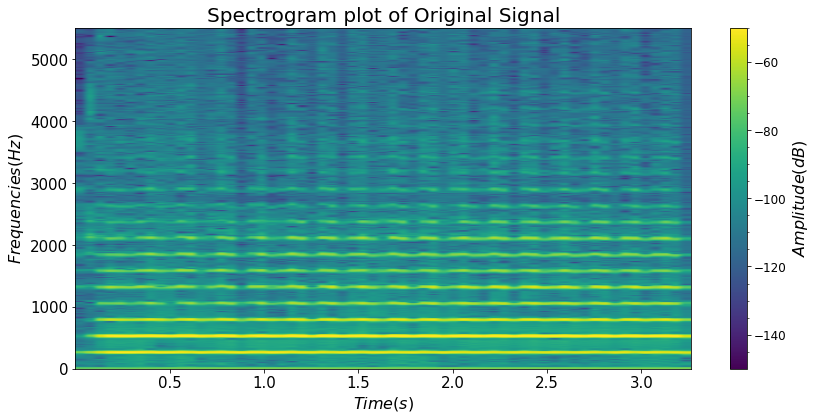

<Figure size 864x432 with 0 Axes>

In [148]:
Fs, signal = wavfile.read('instru1.wav')
signal = signal/32767
spectrogram(signal, 600, Fs, window='hamming', title=r'Spectrogram plot of Original Signal',savfile = 'q3p1.png')
print('Sampling rate of instrument : {}Hz'.format(Fs))
display(Audio(data=signal, rate=Fs))

In [149]:
X = fft(signal)
X = X/np.max(np.abs(X))
for i in range (len(X)):
  if (np.abs(X[i])<=0.1):
    X[i]=0;
  elif (i==0):
    X[i]=0 
peaks = sp.find_peaks(np.abs(X))[0] 
fundamental_frequency = (peaks[0]/len(X)) * Fs
print('Fundamental frequency of the instru1 audio signal: {} Hz'.format(fundamental_frequency))

Fundamental frequency of the instru1 audio signal: 256.69241379310347 Hz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


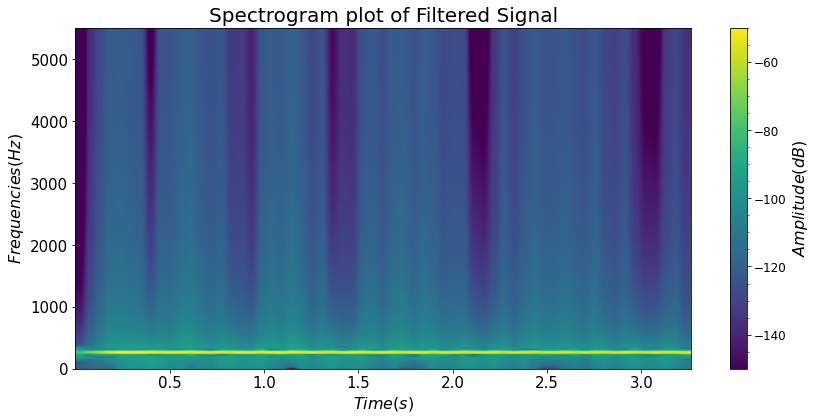

<Figure size 864x432 with 0 Axes>

In [150]:
Fl = 200
Fu = 300

Fs1 = 100
Fs2 = 400

fl = Fl/Fs
fu = Fu/Fs

fs1 = Fs1/Fs
fs2 = Fs2/Fs

fc1 = 0.5*(fs1+fl)
fc2 = 0.5*(fs2+fu)

if np.ceil(5.5 /(fl - fs1)) % 2:
    M = int(np.ceil(5.5/(fl-fs1)))
else:
    M = int(np.ceil(5.5/(fl-fs1))+1)

num = sp.firwin(M, [2*fc1, 2*fc2], window='hanning', pass_zero=False)
d = np.zeros(M)
d[0] = 1
y = sp.lfilter(num, d, signal)

spectrogram(y, 600, Fs, window='hamming', title=r'Spectrogram plot of Filtered Signal',savfile = 'q3p2.png')
wavfile.write('instrument_filtered.wav', Fs, (32767*y).astype(np.int16))
display(Audio(data=(32767*y).astype(np.int16), rate=Fs))

In [151]:
X = fft(y)
X = X/np.max(np.abs(X))
for i in range (len(X)):
  if (np.abs(X[i])<=0.1):
    X[i]=0;
  elif (i==0):
    X[i]=0 
peaks = sp.find_peaks(np.abs(X))[0] 
fundamental_frequency = (peaks[0]/len(X)) * Fs
print('Fundamental frequency of the filtered audio signal: {} Hz'.format(fundamental_frequency))

Fundamental frequency of the filtered audio signal: 256.69241379310347 Hz
